In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = 14, 8

In [19]:
n = 6
files = np.load('res_numeric_iter.npz')
res_numeric_iter = files['arr_0']
files = np.load('res_numeric_time.npz')
res_numeric_time = files['arr_0']
files = np.load('res_numeric_time_2.npz')
res_numeric_time_2 = files['arr_0']

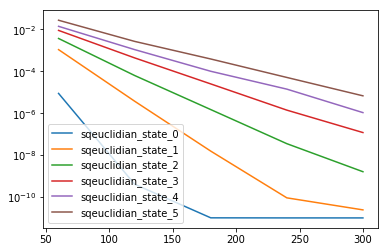

In [10]:
# for j in range(n):
#     chebyshev = []
#     for res in res_numeric_iter:
#         chebyshev.append(res['chebyshev'][j])
#     plt.semilogy([i * 1e5 for i in range(1,11)], chebyshev, label='Chebyshev_state_%d' % j)

for j in range(n):
    chebyshev = []
    for res in res_numeric_time:
        chebyshev.append(res['chebyshev'][j])
    plt.semilogy([60 * i for i in range(1,6)], chebyshev, label='sqeuclidian_state_%d' % j)
plt.legend()
plt.show()

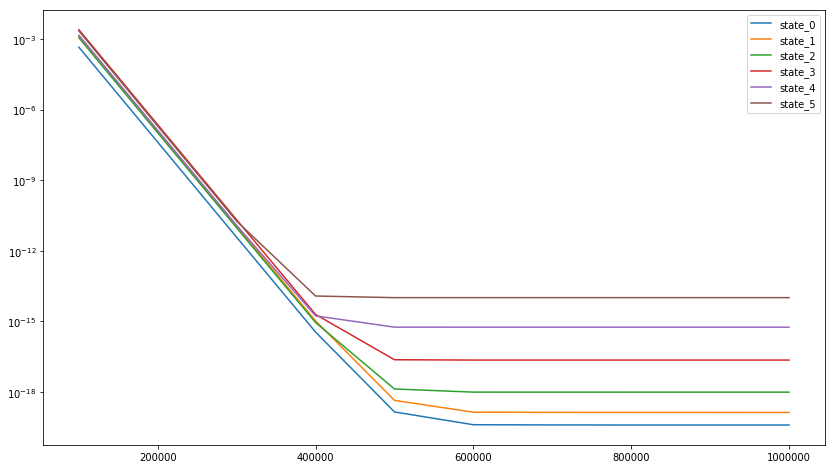

In [73]:
res_iterations = []
for j in range(n):
    precisions = []
    chebyshev = []
    seuclidean = []
    sqeuclidean = []
    for res in res_numeric_iter:
        precisions.append(res['precisions'][j])
        chebyshev.append(res['chebyshev'][j])
        seuclidean.append(res['seuclidean'][j])
        sqeuclidean.append(res['sqeuclidean'][j])
    iterations = [i * 1e5 for i in range(1,11)]
    for i, it in enumerate(iterations):
        res_iterations.append({
            'state': j,
            'iterations': it,
            'eigenvalue_precision': precisions[i],
            'eigenstate_chebyshev': chebyshev[i],
            'eigenstate_seuclidean': seuclidean[i],
            'eigenstate_sqeuclidean': sqeuclidean[i],
        })
res_iterations = pd.DataFrame(res_iterations)
for j in range(6):
    j_es = res_iterations.loc[res_iterations['state'] == j]
    plt.semilogy(j_es['iterations'], j_es['eigenstate_sqeuclidean'], label='state_%d' % j)
plt.legend()
plt.show()
chebyshev = res_iterations.pivot(index='iterations', columns='state', values='eigenstate_chebyshev').reset_index(level=0)
sqeuclidean = res_iterations.pivot(index='iterations', columns='state', values='eigenstate_sqeuclidean').reset_index(level=0)
chebyshev.to_csv('oscilador_harmonica_quantico_por_iteracoes_chebyshev.csv', index=False)
sqeuclidean.to_csv('oscilador_harmonica_quantico_por_iteracoes_sqeuclidean.csv', index=False)

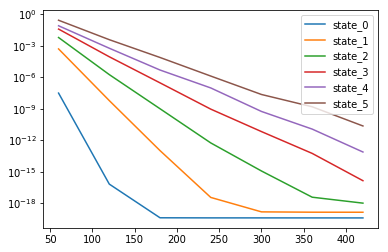

In [21]:
res_timers = []
for j in range(n):
    precisions = []
    chebyshev = []
    seuclidean = []
    sqeuclidean = []
    for res in res_numeric_time:
        precisions.append(res['precisions'][j])
        chebyshev.append(res['chebyshev'][j])
        seuclidean.append(res['seuclidean'][j])
        sqeuclidean.append(res['sqeuclidean'][j])
    timers = [60 * i for i in range(1,6)]
    for i, tim in enumerate(timers):
        res_timers.append({
            'state': j,
            'time': tim,
            'eigenvalue_precision': precisions[i],
            'eigenstate_chebyshev': chebyshev[i],
            'eigenstate_seuclidean': seuclidean[i],
            'eigenstate_sqeuclidean': sqeuclidean[i],
        })
        
for j in range(n):
    precisions = []
    chebyshev = []
    seuclidean = []
    sqeuclidean = []
    for res in res_numeric_time_2:
        precisions.append(res['precisions'][j])
        chebyshev.append(res['chebyshev'][j])
        seuclidean.append(res['seuclidean'][j])
        sqeuclidean.append(res['sqeuclidean'][j])
    timers = [60 * i for i in range(6,8)]
    for i, tim in enumerate(timers):
        res_timers.append({
            'state': j,
            'time': tim,
            'eigenvalue_precision': precisions[i],
            'eigenstate_chebyshev': chebyshev[i],
            'eigenstate_seuclidean': seuclidean[i],
            'eigenstate_sqeuclidean': sqeuclidean[i],
        })
        
res_timers = pd.DataFrame(res_timers)
for j in range(6):
    j_es = res_timers.loc[res_timers['state'] == j]
    plt.semilogy(j_es['time'], j_es['eigenstate_sqeuclidean'], label='state_%d' % j)
plt.legend()
plt.show()
# chebyshev = res_timers.pivot(index='time', columns='state', values='eigenstate_chebyshev').reset_index(level=0)
# sqeuclidean = res_timers.pivot(index='time', columns='state', values='eigenstate_sqeuclidean').reset_index(level=0)
# chebyshev.to_csv('oscilador_harmonica_quantico_por_tempo_chebyshev.csv', index=False)
# sqeuclidean.to_csv('oscilador_harmonica_quantico_por_tempo_sqeuclidean.csv', index=False)

In [7]:
pe = pd.read_csv('onda_plana_pseudo_analitica_resultados_pe.csv')
cn = pd.read_csv('onda_plana_pseudo_analitica_resultados_cn.csv')
rk = pd.read_csv('onda_plana_pseudo_analitica_resultados_rk.csv')

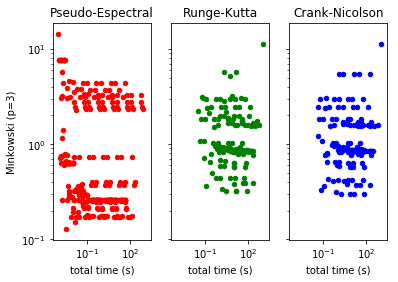

In [14]:
pec = pe.copy()
cnc = cn.copy()
rkc = rk.copy()

# scale results for quality indicator
scaler = StandardScaler()
cols = ['stdvar', 'skew', 'a', 'stdvar_real', 'skew_real', 'a_real']
pec[cols] = scaler.fit_transform(pec[cols])
rkc[cols] = scaler.fit_transform(rkc[cols])
cnc[cols] = scaler.fit_transform(cnc[cols])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
with pd.plotting.plot_params.use('x_compat', True):
    def minkowski(line, p=3):
        x_num = [[line['stdvar'], line['skew'], \
            line['a']]]
        x_ana = [[line['stdvar_real'], line['skew_real'], \
            line['a_real']]]
        dist = cdist(XA=x_num, XB=x_ana, metric='minkowski', p=p)
        return dist[0][0]

    pec['minkowski'] = pec.apply(minkowski, axis=1)
    pec.plot(x='program_time', y='minkowski', kind='scatter', \
        loglog=True, color='r', ax=ax1)

    rkc['minkowski'] = rkc.apply(minkowski, axis=1)
    rkc.plot(x='program_time', y='minkowski', kind='scatter', \
        loglog=True, color='g', ax=ax2)

    cnc['minkowski'] = cnc.apply(minkowski, axis=1)
    cnc.plot(x='program_time', y='minkowski', kind='scatter', \
        loglog=True, color='b', ax=ax3)

ax1.title.set_text('Pseudo-Espectral')
ax2.title.set_text('Runge-Kutta')
ax3.title.set_text('Crank-Nicolson')
ax1.set_ylabel('Minkowski (p=3)')
ax2.set_ylabel('Minkowski (p=3)')
ax3.set_ylabel('Minkowski (p=3)')
ax1.set_xlabel('total time (s)')
ax2.set_xlabel('total time (s)')
ax3.set_xlabel('total time (s)')
plt.show()

In [18]:
pec[['program_time', 'minkowski']].to_csv('minkowski_comparison_pseudo_espectral.csv')
rkc[['program_time', 'minkowski']].to_csv('minkowski_comparison_runge_kutta.csv')
cnc[['program_time', 'minkowski']].to_csv('minkowski_comparison_crank_nicolson.csv')